# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.2367,  0.4748,  0.8764,  0.858 ,  0.7791,  0.353 ,  0.217 ,  0.3941,  0.7989,  0.1534,
        0.606 ,  0.5157,  0.0013,  0.3619,  0.1233,  0.5982,  0.0533,  0.9911,  0.6187,  0.0783,
        0.3892,  0.2144,  0.4323,  0.8829,  0.9195,  0.8247,  0.3298,  0.3635,  0.9457,  0.1474])

In [6]:
y

array([  8.7101,   9.4245,  10.6292,  10.5741,  10.3373,   9.0589,   8.6509,   9.1822,  10.3968,
         8.4603,   9.8179,   9.5472,   8.0039,   9.0858,   8.3698,   9.7947,   8.16  ,  10.9733,
         9.8561,   8.2348,   9.1676,   8.6433,   9.297 ,  10.6486,  10.7584,  10.4741,   8.9894,
         9.0904,  10.837 ,   8.4423])

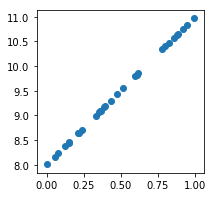

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0185

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani